<h1>Olympics Analysis</h1>

<h3>Importing Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<h3>Load Data Set</h3>

In [2]:
df = pd.read_csv('athlete_events.csv')

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


<h4>Check shape of the data set</h4>

In [4]:
df.shape

(271116, 15)

<h4>Check info of the data set</h4>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


<h6>so as we can see Age Column have some missing values</h6>
<h6>Height & weight columns have lots of missing value</h6>
<h6>Medal Column have missing values because not every athlete wins the medal</h6>

<h4>Lets Check statistics of the Numeric Column</h4>

In [6]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


<h6>As we can see lowest age is 10 & the max Age is 97 Lets Check who they are</h6>

In [7]:
# For lowest age
df[df['Age']==10]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


In [8]:
# For Highest age
df[df['Age']==97]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


<h4>Check Null Values</h4>

In [9]:
missing_values = df.isnull()

In [10]:
missing_values

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
271112,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
271113,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
271114,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


<h4>Count missing values in Column</h4>

In [11]:
for column in missing_values.columns.values.tolist():
    print(column)
    print(missing_values[column].value_counts())
    print(" ")

ID
False    271116
Name: ID, dtype: int64
 
Name
False    271116
Name: Name, dtype: int64
 
Sex
False    271116
Name: Sex, dtype: int64
 
Age
False    261642
True       9474
Name: Age, dtype: int64
 
Height
False    210945
True      60171
Name: Height, dtype: int64
 
Weight
False    208241
True      62875
Name: Weight, dtype: int64
 
Team
False    271116
Name: Team, dtype: int64
 
NOC
False    271116
Name: NOC, dtype: int64
 
Games
False    271116
Name: Games, dtype: int64
 
Year
False    271116
Name: Year, dtype: int64
 
Season
False    271116
Name: Season, dtype: int64
 
City
False    271116
Name: City, dtype: int64
 
Sport
False    271116
Name: Sport, dtype: int64
 
Event
False    271116
Name: Event, dtype: int64
 
Medal
True     231333
False     39783
Name: Medal, dtype: int64
 


<h4>Top Countries Participating</h4>

In [12]:
top_10 = df.Team.value_counts().sort_values(ascending=False).head(10)

In [13]:
top_10

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

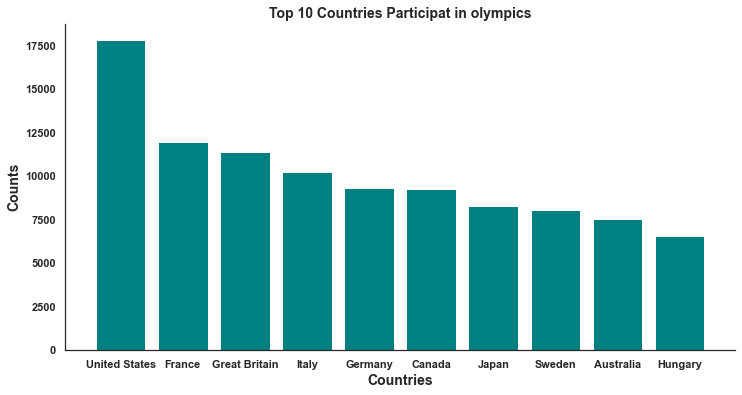

In [128]:
plt.figure(figsize=(12,6))
sns.set_style('white')
plt.bar(x=top_10.index,height=top_10,color='teal')
plt.title('Top 10 Countries Participat in olympics',fontsize=14,weight='bold')
plt.xlabel('Countries',fontsize=14,weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.ylabel('Counts',fontsize=14,weight='bold')
sns.despine()
plt.show()

<h4>Age distribution of the participants</h4>

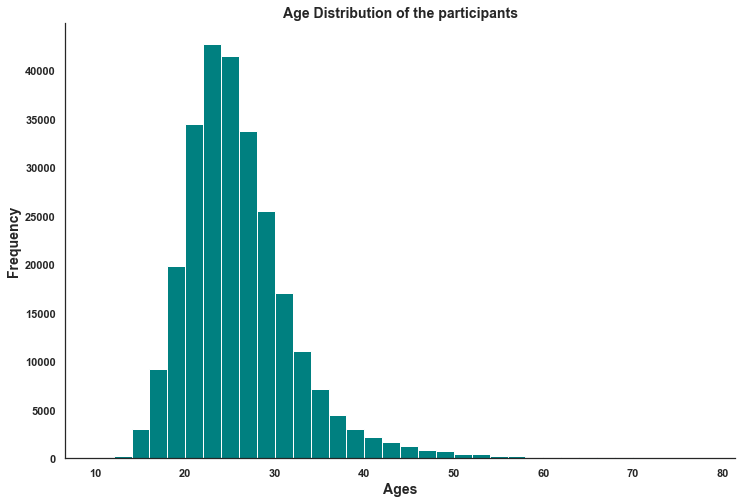

In [15]:
plt.figure(figsize=(12,8))
plt.hist(x=df['Age'],bins=np.arange(10,80,2),color='teal')
plt.title('Age Distribution of the participants',fontsize=14,weight='bold')
plt.xlabel('Ages',fontsize=14,weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.ylabel('Frequency',fontsize=14,weight='bold')
sns.despine()
plt.show()

<h4>Winter Sports </h4>

In [16]:
winter_sports = df[df['Season']=='Winter']['Sport'].unique()

In [17]:
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

<h4>Summer Sports</h4>

In [18]:
summer_sports = df[df['Season']=='Summer']['Sport'].unique()

In [19]:
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

<h3>Male And Female Participants</h3>

In [20]:
gen = df['Sex'].value_counts()

In [21]:
gen

M    196594
F     74522
Name: Sex, dtype: int64

<h4>Plot The Pie Charts of male and female participants</h4>

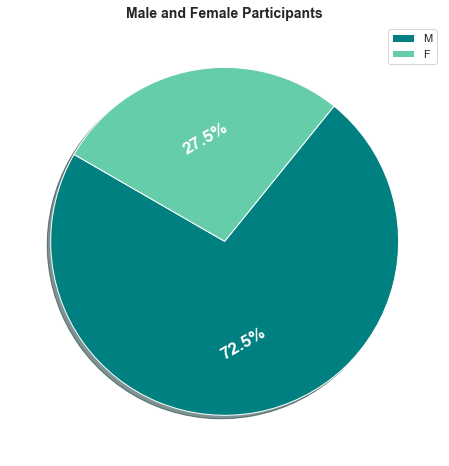

In [22]:
plt.figure(figsize=(10,8))
plt.pie(gen,labels=gen.index,autopct='%1.1f%%',colors=['teal','mediumaquamarine'],textprops={'size':'x-large','fontweight':'bold','rotation':'30','color':'w'},
        startangle=150,shadow=True)
plt.title('Male and Female Participants',fontsize=14,weight='bold')
plt.legend()
plt.show()

<h3>Total Numbers of Female Athlete in each Summer Olympics</h3>

In [23]:
df_female = df[(df['Sex']=='F') & (df['Season']=='Summer')][['Year','Sex']]

In [24]:
df_female = df_female.groupby('Year').count().reset_index()
df_female.head()

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87


In [25]:
women = df[(df['Sex']=='F') & (df['Season']=='Summer')]

<h3>Plot Bar Graph</h3>

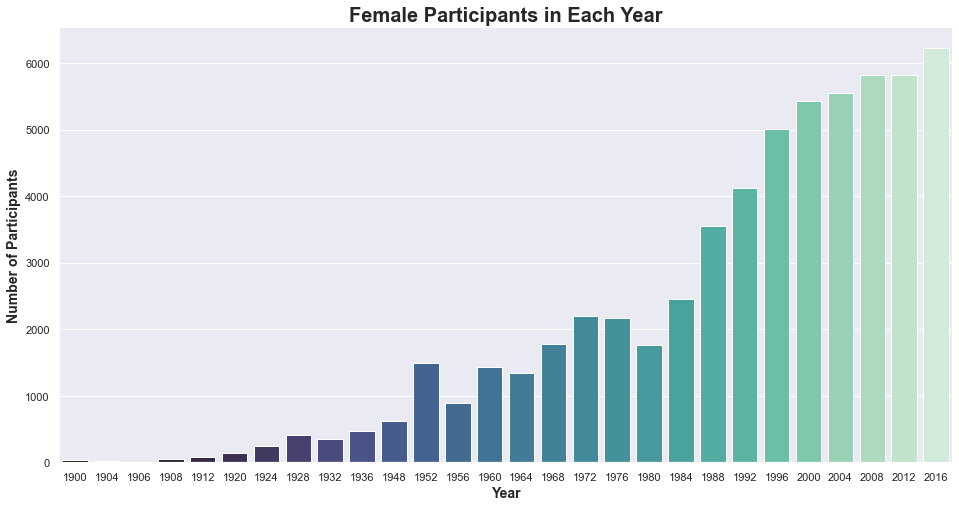

In [26]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(16,8))
sns.countplot(x='Year',data=women,palette='mako')
plt.title('Female Participants in Each Year',fontsize=20,weight='bold')
plt.xlabel('Year',fontsize=14,weight='bold')
plt.ylabel('Number of Participants',fontsize=14,weight='bold')
plt.show()

<h3>Total Numbers of Male Athlete in each Summer Olympics</h3>

In [27]:
df_male = df[(df['Sex']=='M') & (df['Season']=='Summer')][['Year','Sex']]
df_male=df_male.groupby('Year').count().reset_index()
df_male.head()

,Year,Sex
0,1896,380
1,1900,1903
2,1904,1285
3,1906,1722
4,1908,3054


<h3>Plot Bar Graph</h3>


In [28]:
male = df[(df['Sex']=='M') & (df['Season']=='Summer')]

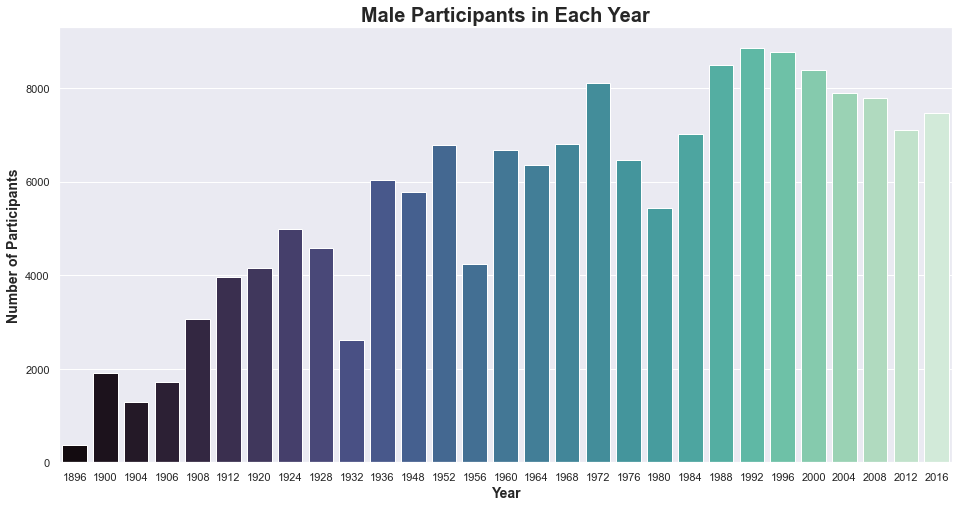

In [29]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(16,8))
sns.countplot(x='Year',data=male,palette='mako')
plt.xlabel('Year',fontsize=14,weight='bold')
plt.ylabel('Number of Participants',fontsize=14,weight='bold')
plt.title('Male Participants in Each Year',fontsize=20,weight='bold')
plt.show()

<h3>Top 5 Country which wins the Gold Medal</h3>

In [127]:
df_goldmedals = df[df['Medal']=='Gold']
#df_goldmedals.head()

In [31]:
Total_Gold = df_goldmedals['Team'].value_counts().reset_index(name='Medal').head(5)

In [32]:
Total_Gold

,index,Medal
0,United States,2474
1,Soviet Union,1058
2,Germany,679
3,Italy,535
4,Great Britain,519


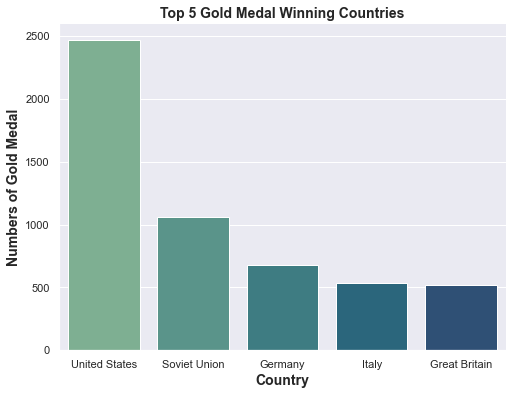

In [33]:
plt.figure(figsize=(8,6))
sns.barplot(x='index',y='Medal',data=Total_Gold,palette='crest')
plt.title('Top 5 Gold Medal Winning Countries',fontsize='14',weight='bold')
plt.xlabel('Country',fontsize=14,weight='bold')
plt.ylabel('Numbers of Gold Medal',fontsize=14,weight='bold')
sns.despine()
plt.show()

<h3>Top 5 Country which wins the Silver Medal</h3>

In [34]:
df_silvermedals = df[df['Medal']=='Silver']
df_silvermedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver
67,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Combined,Silver
86,25,Alf Lied Aanning,M,24.0,NaN,NaN,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System",Silver
92,30,Pepijn Aardewijn,M,26.0,189.0,72.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver
106,38,Karl Jan Aas,M,20.0,NaN,NaN,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System",Silver


In [35]:
Total_Silver = df_silvermedals['Team'].value_counts().reset_index(name='Medal').head(5)

In [36]:
Total_Silver

,index,Medal
0,United States,1512
1,Soviet Union,716
2,Germany,627
3,Great Britain,582
4,France,518


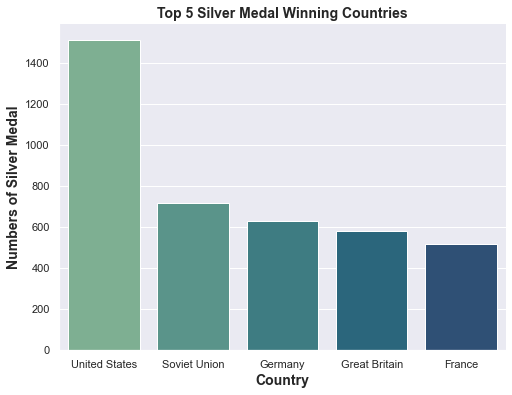

In [37]:
plt.figure(figsize=(8,6))
sns.barplot(x='index',y='Medal',data=Total_Silver,palette='crest')
plt.title('Top 5 Silver Medal Winning Countries',fontsize='14',weight='bold')
plt.xlabel('Country',fontsize=14,weight='bold')
plt.ylabel('Numbers of Silver Medal',fontsize=14,weight='bold')
sns.despine()
plt.show()

<h3>Top 5 Country which wins the Silver Medal</h3>

In [38]:
df_bronzemedals = df[df['Medal']=='Bronze']
df_bronzemedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
50,17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze


In [39]:
Total_Bronze = df_bronzemedals['Team'].value_counts().reset_index(name='Medal').head(5)

In [40]:
Total_Bronze

,index,Medal
0,United States,1233
1,Germany,678
2,Soviet Union,677
3,France,577
4,Great Britain,572


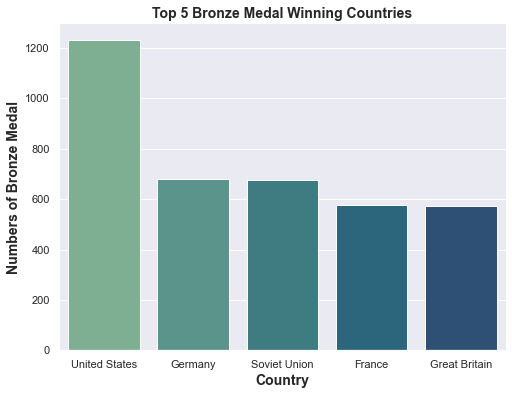

In [100]:
plt.figure(figsize=(8,6))
sns.barplot(x='index',y='Medal',data=Total_Bronze,palette='crest')
plt.title('Top 5 Bronze Medal Winning Countries',fontsize='14',weight='bold')
plt.xlabel('Country',fontsize=14,weight='bold')
plt.ylabel('Numbers of Bronze Medal',fontsize=14,weight='bold')
sns.despine()
plt.show()

In [97]:
df_m =df_most_medal.groupby('Name').count().sort_values(by='Medal',ascending=False).reset_index().head(10)

In [98]:
df_m

,Name,Medal
0,"Michael Fred Phelps, II",28
1,Larysa Semenivna Latynina (Diriy-),18
2,Nikolay Yefimovich Andrianov,15
3,Takashi Ono,13
4,Borys Anfiyanovych Shakhlin,13
5,Ole Einar Bjrndalen,13
6,Edoardo Mangiarotti,13
7,Natalie Anne Coughlin (-Hall),12
8,Sawao Kato,12
9,"Dara Grace Torres (-Hoffman, -Minas)",12


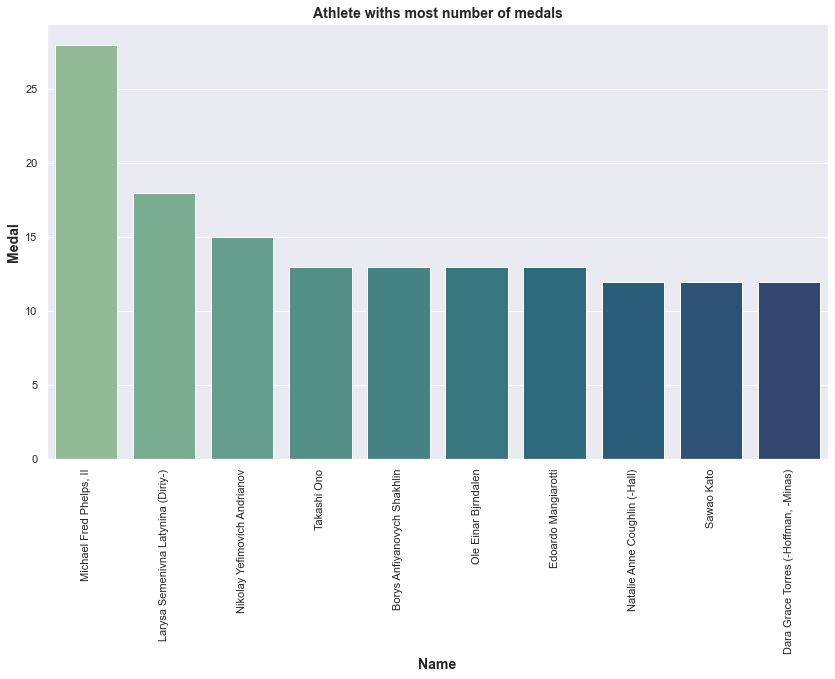

In [122]:
plt.figure(figsize=(14,8))
sns.barplot(x='Name',y='Medal',data = df_m,palette="crest")
plt.title('Athlete withs most number of medals',fontsize=14,weight='bold')
plt.xlabel('Name',fontsize=14,weight='bold')
plt.xticks(rotation=90)
plt.ylabel('Medal',fontsize=14,weight='bold')
plt.show()

<h3>Rio Olympics</h3>

In [81]:
max_year = df['Year'].max()
max_year

2016

In [43]:
team_names = df[(df['Year']==max_year) & (df['Medal']=='Gold')]['Team']
team_names = team_names.value_counts().reset_index(name='Medal').head(20)
team_names

,index,Medal
0,United States,137
1,Great Britain,64
2,Russia,50
3,Germany,47
4,China,44
5,Brazil,34
6,Australia,23
7,Argentina,21
8,France,20
9,Japan,17


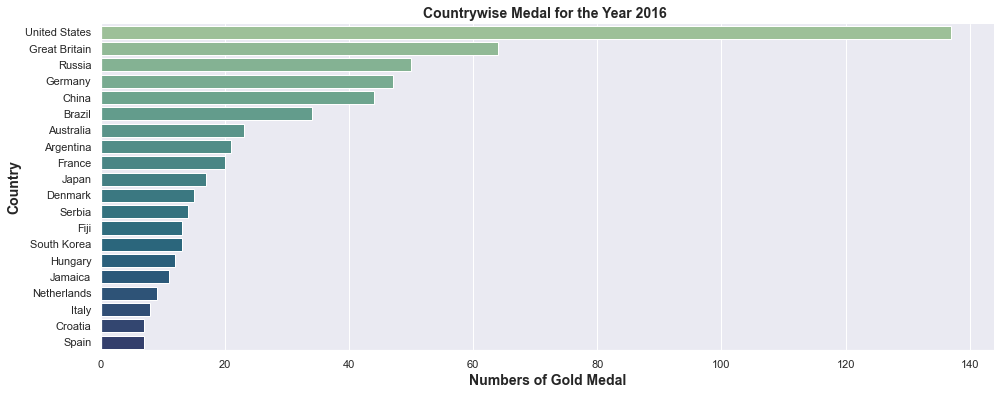

In [44]:
plt.figure(figsize=(16,6))
sns.barplot(x='Medal',y='index',data=team_names,palette='crest')
plt.title('Countrywise Medal for the Year 2016 ',fontsize='14',weight='bold')
plt.xlabel('Numbers of Gold Medal',fontsize=14,weight='bold')
plt.ylabel('Country',fontsize=14,weight='bold')
sns.despine()
plt.show()

In [45]:
df_pak = df[df['Team']=='Pakistan']

In [46]:
df_pak

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
233,111,Aqarab Abbas,M,22.0,190.0,88.0,Pakistan,PAK,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's Hammer Throw,NaN
237,115,Ghulam Abbas,M,24.0,181.0,74.0,Pakistan,PAK,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's 400 metres Hurdles,NaN
245,121,Muhammad Abbas,M,23.0,168.0,55.0,Pakistan,PAK,2010 Winter,2010,Winter,Vancouver,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN
247,123,Sohail Abbas,M,25.0,178.0,80.0,Pakistan,PAK,2000 Summer,2000,Summer,Sydney,Hockey,Hockey Men's Hockey,NaN
248,123,Sohail Abbas,M,29.0,178.0,80.0,Pakistan,PAK,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268234,134200,Aurang Zeb,M,29.0,NaN,NaN,Pakistan,PAK,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Men's 400 metres,NaN
268235,134200,Aurang Zeb,M,29.0,NaN,NaN,Pakistan,PAK,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Men's 4 x 400 metres Relay,NaN
269610,134907,Qamar Zia,M,22.0,168.0,61.0,Pakistan,PAK,1976 Summer,1976,Summer,Montreal,Hockey,Hockey Men's Hockey,Bronze
269611,134908,Qasim Zia,M,22.0,174.0,71.0,Pakistan,PAK,1984 Summer,1984,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold


In [47]:
df_pak['Medal'].value_counts()

Silver    45
Gold      42
Bronze    34
Name: Medal, dtype: int64

<h3>let's check who wins most numbers of medals in olympics for pakistan</h3>

In [48]:
pak_names = df_pak.Name.value_counts().sort_values(ascending=False).reset_index(name='Medal').head(10)

In [49]:
pak_names

,index,Medal
0,Muhammad Sharif Butt,8
1,Abdul Khaliq,6
2,Abdul Aziz,6
3,Abdul Rashid,6
4,Muhammad Naqi Mallick,6
5,Ghulam Raziq,6
6,Shazada Muhammad Shah-Rukh,5
7,Abdul Hamid,5
8,Muhammad Bashir,4
9,Muhammad Ashiq,4


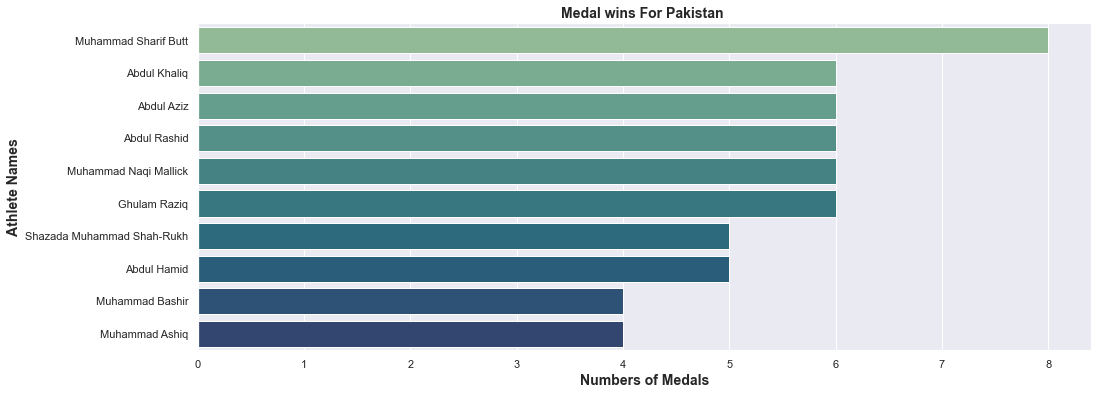

In [50]:
plt.figure(figsize=(16,6))
sns.barplot(x='Medal',y='index',data=pak_names,palette='crest')
plt.title('Medal wins For Pakistan ',fontsize='14',weight='bold')
plt.xlabel('Numbers of Medals',fontsize=14,weight='bold')
plt.ylabel('Athlete Names',fontsize=14,weight='bold')
sns.despine()
plt.show()

<h3>Lets check participations of pakistani athletes in olympics each Year</h3>

In [124]:
df_pak_trend = df_pak[['Year','Sex']]

In [125]:
df_pak_trend.head()

,Year,Sex
233,1996,M
237,1992,M
245,2010,M
247,2000,M
248,2004,M


In [126]:
df_pak_trend = df_pak_trend.groupby('Year').count().reset_index()
df_pak_trend.head(6)

,Year,Sex
0,1948,44
1,1952,51
2,1956,79
3,1960,53
4,1964,47
5,1968,15


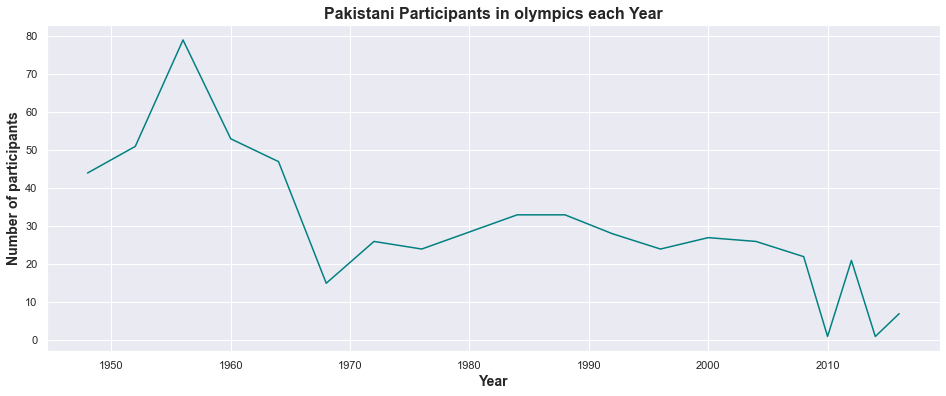

In [54]:
plt.figure(figsize=(16,6))
plt.plot(df_pak_trend['Year'],df_pak_trend['Sex'],color ='teal')
plt.title('Pakistani Participants in olympics each Year',fontsize=16,weight='bold')
plt.xlabel('Year',fontsize=14,weight='bold')
plt.ylabel('Number of participants',fontsize=14,weight='bold')
plt.show()

In [55]:
df_pak['Sport'].unique()

array(['Athletics', 'Alpine Skiing', 'Hockey', 'Wrestling', 'Swimming',
       'Boxing', 'Sailing', 'Rowing', 'Cycling', 'Weightlifting',
       'Shooting', 'Table Tennis', 'Judo'], dtype=object)

In [56]:
df_pak['Sport'].value_counts()

Hockey           245
Athletics        130
Boxing            48
Wrestling         32
Cycling           31
Swimming          25
Shooting          22
Weightlifting     12
Sailing           10
Rowing             3
Alpine Skiing      2
Table Tennis       1
Judo               1
Name: Sport, dtype: int64

In [57]:
df_sp = df_pak['Sport'].value_counts().reset_index(name='count')

In [58]:
df_sp

,index,count
0,Hockey,245
1,Athletics,130
2,Boxing,48
3,Wrestling,32
4,Cycling,31
5,Swimming,25
6,Shooting,22
7,Weightlifting,12
8,Sailing,10
9,Rowing,3


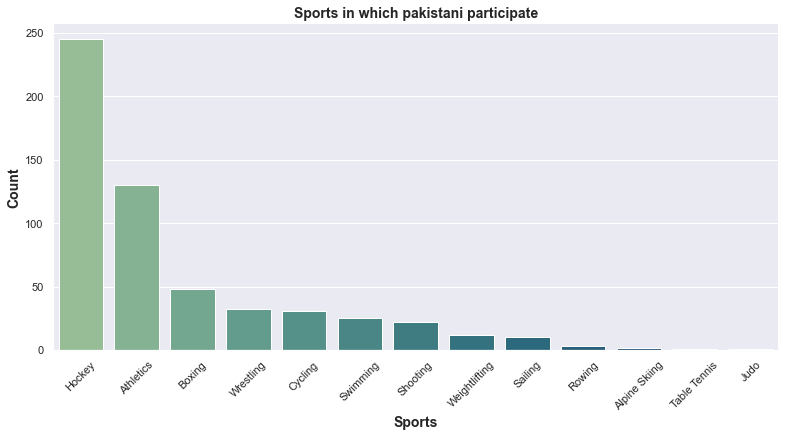

In [59]:
plt.figure(figsize=(13,6))
sns.barplot(x='index',y='count',data=df_sp,palette='crest')
plt.title('Sports in which pakistani participate',fontsize='14',weight='bold')
plt.xlabel('Sports',fontsize=14,weight='bold')
plt.xticks(rotation=45)
plt.ylabel('Count',fontsize=14,weight='bold')
sns.despine()
plt.show()

<h4>Outcomes</h4>
<li>United States With Most Number of participations in olympics.</li>
<li>Female Participations in olympics is increasing by each Year.</li>
<li>Most Number of Gold,Silver and Bronze medals wins by United States.</li>
<li>Michael Fred Phelps, II	wins the most medals in olympics 28 medals.</li>
<li>In Rio olympics Us wins 134 medals and great britain wins 64 medals.</li>
<li>Muhammad Sharif Butt wins most medals for pakistan in olympics. </li>
<li>Participations in olympics from pakistan is decrease after 1964 in rio olympics only 7 people from pakistan participate in olympics.</li>
<li>Hockey, athletics,boxing is the keys sports in which pakistan participate mostly.</li>
<li>Pakistan has huge talent but they need support and resources to represent pakistan at international level and show there talent to the world.</li>